### In this script, we use the historical home data from Zillow.com to find the percent change of average home price in each zipcode. We compare the percent change between zips with/without universities, universities sizes and other grouping strategies.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 300)

In [28]:
# we found the 4 bedroom houses are more relevant to universities, so we downloaded the 4 bedroom data.
zillow_4bed = pd.read_csv("../data/zillow/zip_4bed.csv",low_memory=False)
print zillow_4bed.head(10)

   RegionID  RegionName           City State              Metro  \
0     84654       60657        Chicago    IL            Chicago   
1     84616       60614        Chicago    IL            Chicago   
2     93144       79936        El Paso    TX            El Paso   
3     84640       60640        Chicago    IL            Chicago   
4     91733       77084        Houston    TX            Houston   
5     97564       94109  San Francisco    CA      San Francisco   
6     90668       75070       McKinney    TX  Dallas-Fort Worth   
7     91982       77494    Cinco Ranch    TX            Houston   
8     91940       77449        Cypress    TX            Houston   
9     84646       60647        Chicago    IL            Chicago   

      CountyName  SizeRank   1996-04   1996-05   1996-06   1996-07   1996-08  \
0           Cook         1  382700.0  379400.0  378700.0  379700.0  379400.0   
1           Cook         2  458100.0  462200.0  463800.0  467300.0  470200.0   
2        El Paso      

In [12]:
# check how many rows contains any null
total_row = zillow_4bed.shape[0]
nan_row = zillow_4bed.dropna().shape[0]
print "total number of rows: %d" %total_row
print "number of rows contains null: %d, takes percentage of %.2f" %(nan_row, float(nan_row)/total_row)

total number of rows: 9472
number of rows contains null: 7058, takes percentage of 0.75


In [43]:
# 75% of the rows contain null value so we can't simple disgard those rows.
# Each row has null value at different columns. For example, row 5 has null at each month, 
# and row 6 has null only before 1997-01. Therefore, we need to iterate through rows and handle them individually.
# For each row, we calculate the standard deviation and count the number of prices that are not null, and append them to the dataframe.

def add_variance(df):
    df['std'] = np.nan
    df['valid_price_count'] = np.nan
    for index, row in df.iterrows():
        prices = row[7:]
        # remove NaN
        prices = [price for price in prices if price > 0]
        mean, std = np.mean(prices), np.std(prices)
        df.loc[index, 'std'] = std / mean
        df.loc[index, 'valid_price_count'] = len(prices)

    return df

zillow_stat = add_variance(zillow_4bed)

In [44]:
zillow_stat.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,std,valid_price_count
0,84654,60657,Chicago,IL,Chicago,Cook,1,382700.0,379400.0,378700.0,379700.0,379400.0,379800.0,379300.0,376100.0,369500.0,365100.0,364000.0,366000.0,366600.0,365200.0,363700.0,363400.0,364700.0,369600.0,378200.0,386800.0,395000.0,404100.0,409700.0,410900.0,413300.0,418600.0,422800.0,427400.0,432400.0,435900.0,438700.0,442900.0,449000.0,454300.0,459900.0,464200.0,469300.0,476200.0,482200.0,484400.0,487300.0,491700.0,497500.0,504700.0,509900.0,514900.0,522300.0,527900.0,531600.0,535300.0,542100.0,548000.0,551100.0,550400.0,550400.0,552100.0,555700.0,557100.0,560600.0,570300.0,578300.0,584400.0,589400.0,594600.0,599200.0,604600.0,609900.0,615900.0,621100.0,626700.0,630500.0,627900.0,627700.0,631300.0,634400.0,639700.0,648000.0,653200.0,653600.0,656500.0,665000.0,675400.0,682500.0,690000.0,696800.0,701600.0,703600.0,706000.0,708000.0,711500.0,716100.0,717200.0,707000.0,696600.0,693100.0,693700.0,694600.0,698200.0,706900.0,716400.0,723300.0,730400.0,739300.0,746200.0,758000.0,769500.0,771600.0,770200.0,779000.0,792600.0,801300.0,801300.0,798300.0,794600.0,792600.0,795600.0,801900.0,805800.0,812000.0,823900.0,825500.0,812900.0,804600.0,810300.0,819500.0,827800.0,831700.0,829100.0,821800.0,818700.0,818500.0,819500.0,820100.0,821600.0,817400.0,812500.0,814200.0,818900.0,820000.0,823500.0,825400.0,821200.0,821100.0,822600.0,818700.0,814600.0,811000.0,804400.0,795100.0,785000.0,779100.0,773900.0,770500.0,775700.0,781900.0,778000.0,771000.0,767800.0,766400.0,765100.0,762600.0,758000.0,753100.0,748900.0,754500.0,761400.0,760300.0,756800.0,759300.0,762800.0,763400.0,751200.0,738400.0,739400.0,739600.0,735800.0,733900.0,732100.0,724600.0,710600.0,696700.0,690500.0,689700.0,694200.0,702800.0,705900.0,703500.0,704600.0,705200.0,704000.0,703700.0,709200.0,717600.0,716500.0,712600.0,718300.0,722200.0,722200.0,731700.0,735000.0,726700.0,720400.0,726500.0,738800.0,748800.0,758700.0,779100.0,799600.0,807200.0

In [29]:
univ = pd.read_csv("../data/university.csv",low_memory=False)

In [30]:
univ['students'] = pd.to_numeric(univ['students'], downcast='integer', errors='coerce')
univ.describe()

,latitude,longitude,students
count,1991.000000,1991.000000,1249.000000
mean,38.616845,-89.252640,8689.976781
std,4.796525,15.330240,13742.376471
min,19.699570,-158.056065,50.000000
25%,35.178500,-95.670295,1447.000000
50%,39.759431,-85.495166,3500.000000
75%,41.889814,-77.433195,10364.000000
max,64.857162,-67.458078,222322.000000


In [85]:
large_thre = 20000
large_univ = univ.loc[univ['students'] > large_thre]
small_univ = univ.loc[univ['students'] <= large_thre]
print large_univ.shape

(168, 17)


In [72]:
# find the price standard deviation in two groups: zips with no universities, zips with certain university.
# Among the three arguments, univ is the dataframe containing certain universities. all_univ is the original csv dataframe
# zillow is the processed zillow dataframe with added column 'std'

def two_group_std(univ, all_univ, zillow):
    # convert zip from str to int
    univ_zip = univ['postcode']
    univ_zip = [int(z) for z in univ_zip if z != '\\N']
    all_univ_zip = univ['postcode']
    all_univ_zip = [int(z) for z in all_univ_zip if z != '\\N']
    
    zillow_univ = zillow_stat.loc[zillow_stat['RegionName'].isin(univ_zip)]
    zillow_no_univ = zillow_stat.loc[~zillow_stat['RegionName'].isin(all_univ_zip)]
    
    print np.std(zillow_univ['std']), np.std(zillow_no_univ['std'])

0.0894035701459 0.0866944558773


In [73]:
two_group_std(univ, univ, zillow_stat)
two_group_std(large_univ, univ, zillow_stat)

0.0894035701459 0.0866944558773
0.0978705736383 0.086825701582


In [74]:
# instead of using every month, use the same month in each year to elimitate the variance caused by month

def add_variance_same_month(df):
    df['std'] = np.nan
    df['valid_price_count'] = np.nan
    for index, row in df.iterrows():
        prices = row[7::12]
        # remove NaN
        prices = [price for price in prices if price > 0]
        mean, std = np.mean(prices), np.std(prices)
        df.loc[index, 'std'] = std / mean
        df.loc[index, 'valid_price_count'] = len(prices)

    return df

In [75]:
zillow_same_month_stat = add_variance_same_month(zillow_4bed)
two_group_std(large_univ, univ, zillow_same_month_stat)

0.0990062044437 0.0898100672834


In [76]:
two_group_std(univ, univ, zillow_same_month_stat)

0.0917917779671 0.0897244260666


In [16]:
def add_percent_same_month(df):
    df['percent_mean'] = np.nan
    df['percent_std'] = np.nan
    for index, row in df.iterrows():
        prices = row[7::12]
        prices = [price for price in prices if price > 0]
        percent = []
        for i in range(1, len(prices)):
            percent.append((prices[i] - prices[i-1]) / prices[i-1])
        df.loc[index, 'percent_mean'] = np.mean(percent)
        df.loc[index, 'percent_std'] = np.std(percent)
    return df

def group_percent(univ, zillow):
    # convert zip from str to int
    univ_zip = univ['postcode']
    univ_zip = [int(z) for z in univ_zip if z != '\\N']
    
    zillow_univ = zillow.loc[zillow['RegionName'].isin(univ_zip)]
    zillow_no_univ = zillow.loc[~zillow['RegionName'].isin(univ_zip)]
    
    print "targeted university percentage change mean and std"
    print np.mean(zillow_univ['percent_mean']), np.std(zillow_univ['percent_mean'])
    print "no university percentage change mean and std"
    print np.mean(zillow_no_univ['percent_mean']), np.std(zillow_no_univ['percent_mean'])
    
    return zillow_univ, zillow_no_univ

In [19]:
zillow_percent = add_percent_same_month(zillow_4bed)
large_univ, no_large_univ = group_percent(large_univ, zillow_percent)

targeted university percentage change mean and std
0.0383398597983 0.0223976384088
no university percentage change mean and std
0.0230159939973 0.0383693834929


In [20]:
large_univ.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,percent_mean,percent_std
59,79054,48197,Ypsilanti,MI,Ann Arbor,Washtenaw,60,120200.0,122700.0,124800.0,127000.0,129200.0,131200.0,132500.0,133200.0,134800.0,137800.0,140200.0,141500.0,142800.0,144200.0,145200.0,145900.0,146500.0,147200.0,148200.0,149300.0,150300.0,150600.0,150100.0,150200.0,150700.0,150900.0,151000.0,151500.0,152300.0,152900.0,153700.0,155300.0,157100.0,158900.0,160400.0,161200.0,162000.0,164000.0,166200.0,167800.0,169000.0,169900.0,171000.0,173100.0,175400.0,177700.0,180300.0,183100.0,185000.0,186600.0,187800.0,188800.0,189800.0,190700.0,191500.0,192200.0,192900.0,193800.0,194700.0,194600.0,193600.0,192600.0,192300.0,192800.0,193800.0,195400.0,197500.0,198300.0,197600.0,197000.0,197300.0,198000.0,199200.0,201100.0,202900.0,204700.0,206000.0,206800.0,206400.0,205600.0,205300.0,205600.0,205600.0,205500.0,205800.0,205900.0,205900.0,206600.0,207300.0,208000.0,209100.0,210600.0,212400.0,213900.0,214900.0,216200.0,217400.0,217900.0,217900.0,217900.0,218000.0,218200.0,219100.0,220300.0,220600.0,221000.0,221900.0,222400.0,222300.0,222400.0,222300.0,221500.0,220900.0,220500.0,220000.0,219500.0,219600.0,219700.0,220200.0,220700.0,220300.0,218700.0,217000.0,215800.0,215000.0,213900.0,212700.0,211400.0,209400.0,207400.0,206000.0,204100.0,201700.0,199700.0,198200.0,196200.0,193400.0,190500.0,187800.0,184900.0,182000.0,179900.0,178300.0,176500.0,174500.0,174200.0,174700.0,174300.0,173000.0,171600.0,169300.0,166900.0,165400.0,164100.0,162500.0,160300.0,157600.0,155100.0,153800.0,153100.0,152000.0,150300.0,149000.0,148700.0,149800.0,150100.0,148100.0,145700.0,145300.0,144600.0,143700.0,143600.0,144300.0,144800.0,145700.0,146700.0,146800.0,146000.0,144700.0,144000.0,143900.0,143000.0,140500.0,138100.0,137400.0,138100.0,138100.0,136900.0,135400.0,135200.0,137400.0,141600.0,145500.0,148500.0,150700.0,151900.0,152400.0,153300.0,155100.0,157000.0,157700.0,157800.0,157600.0,157600.0,158800.0,161100.0,163300.0,165

In [100]:
def percent_change(df):
    for col in range(df.shape[1]-1):
        try:
            df.iloc[:,col] = (df.iloc[:,col+1] - df.iloc[:,col]) / df.iloc[:,col]
        except:
            pass
    return df.iloc[:,:-1]


def time_series_percent_stat(df):
    col_num = df.shape[1]
    df['percent_mean'] = np.nan
    df['percent_std'] = np.nan
    for index, row in df.iterrows():
        df.loc[index, 'percent_mean'] = np.nanmean(row[:col_num])
        df.loc[index, 'percent_std'] = np.nanstd(row[:col_num])
    return df


def group_percent_time_series(univ, zillow):
    univ_zip = univ['postcode']
    univ_zip = [int(z) for z in univ_zip if z != '\\N']
    
    zillow_univ = zillow.loc[zillow['RegionName'].isin(univ_zip)]
    zillow_no_univ = zillow.loc[~zillow['RegionName'].isin(univ_zip)]
    zillow_univ = zillow_univ.iloc[:,7::12]
    zillow_no_univ = zillow_no_univ.iloc[:,7::12]
    
    # transpose the dataframe so each zip is in a column instead of in a row
    zillow_univ_t = zillow_univ.T
    zillow_no_univ_t = zillow_no_univ.T
    
    # find percent change  
    zillow_univ_t = percent_change(zillow_univ_t)
    zillow_no_univ_t = percent_change(zillow_no_univ_t)

    
    # find mean percent for each year
    zillow_univ_t = time_series_percent_stat(zillow_univ_t)
    zillow_no_univ_t = time_series_percent_stat(zillow_no_univ_t)

    return zillow_univ_t[['percent_mean', 'percent_std']], zillow_no_univ_t[['percent_mean', 'percent_std']]

In [86]:
zillow_large_univ, zillow_no_large_univ = group_percent_time_series(large_univ, zillow_4bed)
zillow_small_univ, zillow_no_small_univ = group_percent_time_series(small_univ, zillow_4bed)
zillow_univ, zillow_no_univ = group_percent_time_series(univ, zillow_4bed)

In [70]:
zillow_large_univ.head()

,percent_mean,percent_std
1996-04,0.372744,1.395550
1997-04,0.355683,1.390149
1998-04,0.446436,1.543423
1999-04,0.409687,1.590061
2000-04,0.470264,1.750899


In [71]:
zillow_no_large_univ.head()

,percent_mean,percent_std
1996-04,0.224628,0.903585
1997-04,0.246460,0.991415
1998-04,0.259326,1.036110
1999-04,0.276767,1.088342
2000-04,0.308866,1.195930


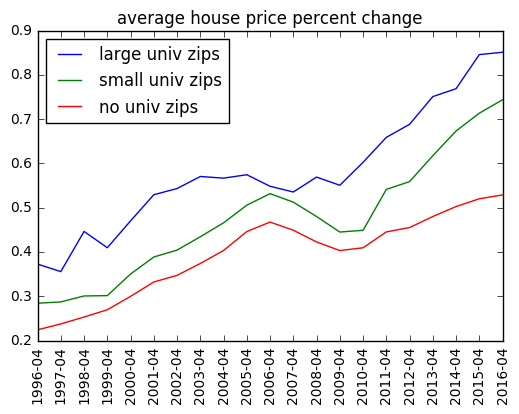

In [103]:
time = zillow_large_univ.index.tolist()
percent_large_univ = zillow_large_univ['percent_mean']
percent_small_univ = zillow_small_univ['percent_mean']
percent_no_univ = zillow_no_univ['percent_mean']

x = np.array(range(len(time)))
plt.xticks(x, time, rotation='vertical')
plt.plot(x, percent_large_univ)
plt.plot(x, percent_small_univ)
plt.plot(x, percent_no_univ)
plt.title('average house price percent change')
plt.legend(['large univ zips', 'small univ zips', 'no univ zips'], loc='best')
plt.show()

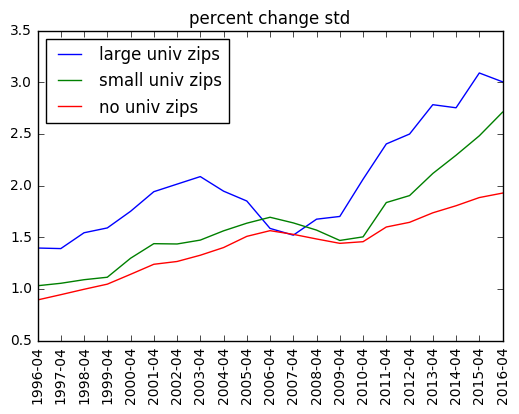

In [102]:
time = zillow_large_univ.index.tolist()
percent_std_large_univ = zillow_large_univ['percent_std']
percent_std_small_univ = zillow_small_univ['percent_std']
percent_std_no_univ = zillow_no_univ['percent_std']

x = np.array(range(len(time)))
plt.xticks(x, time, rotation='vertical')
plt.plot(x, percent_std_large_univ)
plt.plot(x, percent_std_small_univ)
plt.plot(x, percent_std_no_univ)
plt.title('percent change std')
plt.legend(['large univ zips', 'small univ zips', 'no univ zips'], loc='best')
plt.show()